In [72]:
import random
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [73]:
import os 
if os.name == 'nt' :
    font_family = 'Malgun Gothic'
else:
    font_family = "AppleGothic"

In [74]:
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})

In [75]:
np_data = np.random.randint(1, 100, size = 3000)
data = list(np_data)

In [76]:
data[0:2]

[85, 1]

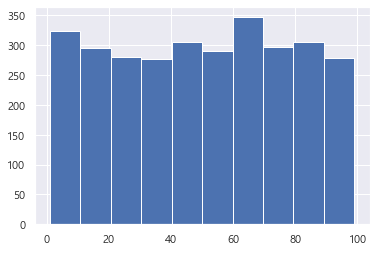

In [77]:
plt.hist(data)
plt.show()

In [78]:
data_mean = np.mean(data)
data_std = np.std(data)

print(data_mean)
print(data_std)

49.818
28.35684883762651


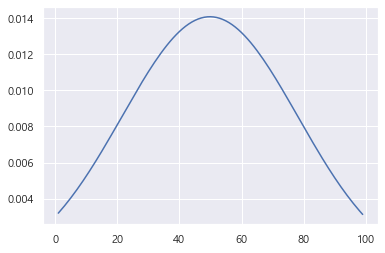

In [79]:
pdf = stats.norm.pdf(np.sort(data), data_mean, data_std)

plt.figure()
plt.plot(np.sort(data), pdf)

In [80]:
std_list =[]

for i in data:
    z = (i - data_mean) / data_std
    std_list.append(z)
    
ol_data_mean = np.mean(std_list)
ol_data_std = np.std(std_list)

print(ol_data_mean)
print(ol_data_std)

7.01660951563099e-17
1.0


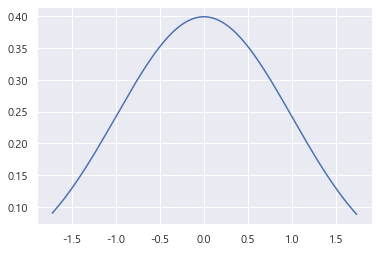

In [81]:
ol_pdf = stats.norm.pdf(np.sort(std_list),
         ol_data_mean, ol_data_std)
plt.figure()
plt.plot(np.sort(std_list), ol_pdf)

In [82]:
ol_data = data.copy()
ol_no = 10

for i in range(ol_no) :
    rand_no = random.randint(0, len(data))
    ol_data.insert(rand_no, ol_data[rand_no]*2)
    

In [83]:
ol_data_mean = np.mean(ol_data)
ol_data_std = np.std(ol_data)

print(ol_data_mean)
print(ol_data_std)

50.072425249169434
28.728354331968788


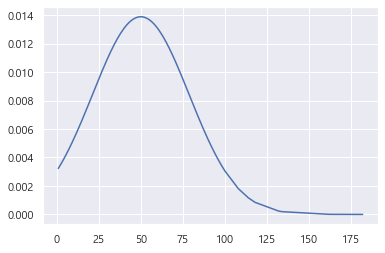

In [84]:
ol_pdf = stats.norm.pdf(np.sort(ol_data),
         ol_data_mean, ol_data_std)

plt.figure()
plt.plot(np.sort(ol_data), ol_pdf)

In [85]:
ol_std_list = []

for i in ol_data :
    z = (i - ol_data_mean) / ol_data_std
    ol_std_list.append(z)
    
ol_st_data_mean = np.mean(ol_std_list)
ol_st_data_std = np.std(ol_std_list)

print(ol_st_data_mean)
print(ol_st_data_std)

2.4491298616315747e-17
1.0


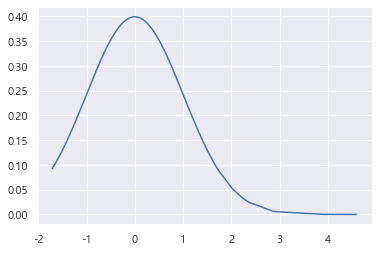

In [86]:
ol_std_pdf = stats.norm.pdf(np.sort(ol_std_list),
             ol_st_data_mean, ol_st_data_std)
plt.figure()
plt.plot(np.sort(ol_std_list), ol_std_pdf)

In [87]:
len(ol_std_list)

3010

In [88]:
for i in ol_std_list :
    z = i
    if z > 2 :
        ol_std_list.remove(z)
    if z < -2 :
        ol_std_list.remove(z)

In [89]:
len(ol_std_list)

3002

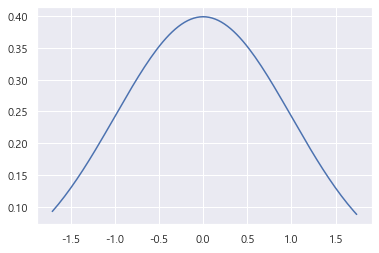

In [90]:
ol_std_pdf = stats.norm.pdf(np.sort(ol_std_list), ol_st_data_mean, ol_st_data_std)

plt.figure()
plt.plot(np.sort(ol_std_list), ol_std_pdf)

In [91]:
boxdata = pd.DataFrame(np.random.randn(100, 3), columns=["A열","B열","C열"])

In [92]:
boxdata.head()

,A열,B열,C열
0,0.351459,-0.343225,-0.037564
1,-1.037928,-0.425653,-0.683418
2,-0.928334,-0.594067,0.601432
3,-0.591760,-0.022446,1.492890
4,-2.194145,-0.351953,-0.018929


In [93]:
boxdata.describe()

,A열,B열,C열
count,100.000000,100.000000,100.000000
mean,-0.033439,-0.081138,0.036451
std,1.014127,0.989886,1.015131
min,-2.194145,-2.546690,-2.146011
25%,-0.665968,-0.746682,-0.627226
50%,-0.068097,-0.245099,0.001449
75%,0.649688,0.671812,0.669712
max,2.673369,2.077322,2.551354


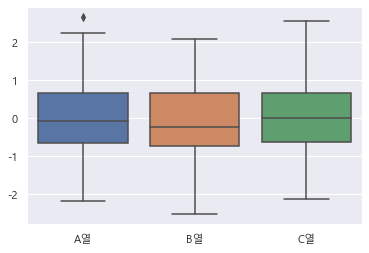

In [94]:
sns.boxplot(data = boxdata)
plt.show()

In [95]:
def get_outlier(df=None, column=None, weight=1.5) :
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)
    
    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight
    
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
    
    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    return outlier_idx

In [96]:
outlier_idx = get_outlier(df=boxdata, column='B열', weight=1.5)

In [97]:
outlier_idx

Int64Index([], dtype='int64')

In [98]:
boxdata.drop(outlier_idx, axis=0, inplace=True)

In [99]:
boxdata.shape

(100, 3)

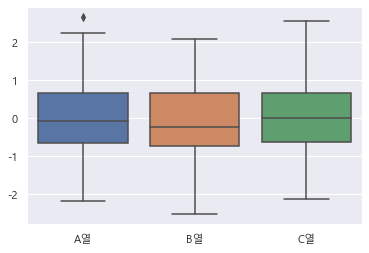

In [100]:
sns.boxplot(data = boxdata)
plt.show()

In [101]:
outlier_idx = get_outlier(df=boxdata, column='A열', weight=1.5)
outlier_idx

Int64Index([63], dtype='int64')

In [102]:
boxdata.drop(outlier_idx, axis=0, inplace=True)
boxdata.shape


(99, 3)

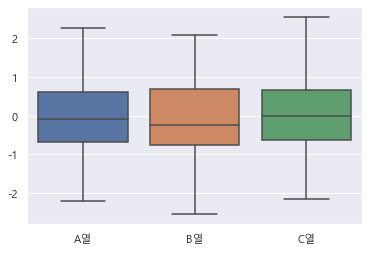

In [103]:
sns.boxplot(data = boxdata)
plt.show()